In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



## OBJECTIVE 

# To explore the relationship between trader performance and market 
# sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading 
# strategies.

In [102]:
sentiment_data = pd.read_csv('fear_greed_index.csv')
sentiment_data.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [103]:
trader_data = pd.read_csv('historical_data.csv')
trader_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [104]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [105]:
trader_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [106]:
# separating columns into different types
# categorical columns
cat_cols = [col for col in trader_data.columns if trader_data[col].dtype == 'object']
# numerical columns
num_cols = [col for col in trader_data.columns if trader_data[col].dtype != 'object']

In [107]:
cat_cols

['Account', 'Coin', 'Side', 'Timestamp IST', 'Direction', 'Transaction Hash']

In [108]:
num_cols

['Execution Price',
 'Size Tokens',
 'Size USD',
 'Start Position',
 'Closed PnL',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp']

In [109]:
trader_data.columns = trader_data.columns.str.strip().str.lower().str.replace(' ', '_')


In [110]:
# Parsing the IST timestamp
trader_data['timestamp_ist'] = pd.to_datetime(trader_data['timestamp_ist'], format='%d-%m-%Y %H:%M')

# Conversion of numeric UNIX timestamp 
if trader_data['timestamp'].astype(str).str.len().max() > 10:
    trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], unit='ms')
else:
    trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], unit='s')

# date column for merging with sentiment dataset
trader_data['date'] = trader_data['timestamp_ist'].dt.date


In [111]:
trader_data.head(5)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02


In [ ]:
trader_data['side_encoded'] = trader_data['side'].map({'BUY': 1, 'SELL': 0})
trader_data['direction'] = trader_data['direction'].map({'Buy': 1, 'Sell': 0})
trader_data['direction'].fillna(trader_data['side_encoded'], inplace=True)
trader_data.drop(columns='side_encoded', inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16672\1307135499.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trader_data['direction'].fillna(trader_data['side_encoded'], inplace=True)


In [113]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     211224 non-null  datetime64[ns]
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  float64       
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [114]:
trader_data['direction'].unique()

array([1., 0.])

In [115]:
trader_data['side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [116]:
trader_data['side'] = trader_data['side'].map({'BUY': 1, 'SELL': 0})

In [117]:
trader_data['side'].unique()

array([1, 0])

In [118]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  int64         
 6   timestamp_ist     211224 non-null  datetime64[ns]
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  float64       
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [119]:
trader_data.isnull().sum()

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
date                0
dtype: int64

In [120]:
# EDA for sentiment data
# Convert 'date' to datetime format
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
sentiment_data['date']



0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: date, Length: 2644, dtype: datetime64[ns]

In [121]:
sentiment_data['classification'] = sentiment_data['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Fear',      
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})

In [122]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [123]:
sentiment_data['classification'].unique()

array(['Fear', 'Greed'], dtype=object)

In [124]:
print(trader_data['date'].dtype)
print(sentiment_data['date'].dtype)


object
datetime64[ns]


In [125]:
trader_data['date'] = pd.to_datetime(trader_data['date'])
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])


In [126]:
print(trader_data['date'].dtype)
print(sentiment_data['date'].dtype)


datetime64[ns]
datetime64[ns]


In [127]:
merged_df = pd.merge(
    trader_data,
    sentiment_data[['date', 'classification', 'value']],
    on='date',
    how='inner'
)


In [128]:
merged_df.head(5)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,1,2024-12-02 22:50:00,0.000000,1.0,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02,Greed,80
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,1,2024-12-02 22:50:00,986.524596,1.0,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02,Greed,80
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,1,2024-12-02 22:50:00,1002.518996,1.0,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02,Greed,80
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,1,2024-12-02 22:50:00,1146.558564,1.0,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02,Greed,80
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,1,2024-12-02 22:50:00,1289.488521,1.0,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02,Greed,80


In [169]:
merged_df.to_csv('merged_dataset.csv', index=False)


In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211218 non-null  object        
 1   coin              211218 non-null  object        
 2   execution_price   211218 non-null  float64       
 3   size_tokens       211218 non-null  float64       
 4   size_usd          211218 non-null  float64       
 5   side              211218 non-null  int64         
 6   timestamp_ist     211218 non-null  datetime64[ns]
 7   start_position    211218 non-null  float64       
 8   direction         211218 non-null  float64       
 9   closed_pnl        211218 non-null  float64       
 10  transaction_hash  211218 non-null  object        
 11  order_id          211218 non-null  int64         
 12  crossed           211218 non-null  bool          
 13  fee               211218 non-null  float64       
 14  trad

In [130]:
merged_df['classification'].unique()

array(['Greed', 'Fear'], dtype=object)

In [131]:
merged_df['classification'] = merged_df['classification'].map({'Fear': 0, 'Greed': 1})

In [132]:
merged_df['classification'].unique()

array([1, 0])

In [ ]:
#  Profitable flag: 1 if closed_pnl > 0, else 0
merged_df['profitable'] = (merged_df['closed_pnl'] > 0).astype(int)

#  PnL per USD (to normalize profit or loss per dollar traded)
merged_df['pnl_per_usd'] = merged_df['closed_pnl'] / merged_df['size_usd']

#  Log of trade size (helps reduce skew for modeling)
merged_df['log_size'] = np.log1p(merged_df['size_usd'])  

#  Fee percentage relative to trade size
merged_df['fee_pct'] = merged_df['fee'] / merged_df['size_usd']


In [134]:
merged_df[['closed_pnl', 'size_usd', 'fee', 'profitable', 'pnl_per_usd', 'log_size', 'fee_pct']].head()


,closed_pnl,size_usd,fee,profitable,pnl_per_usd,log_size,fee_pct
0,0.0,7872.16,0.345404,0,0.0,8.971215,0.000044
1,0.0,127.68,0.005600,0,0.0,4.857329,0.000044
2,0.0,1150.63,0.050431,0,0.0,7.048934,0.000044
3,0.0,1142.04,0.050043,0,0.0,7.041447,0.000044
4,0.0,69.75,0.003055,0,0.0,4.259153,0.000044


In [135]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211218 non-null  object        
 1   coin              211218 non-null  object        
 2   execution_price   211218 non-null  float64       
 3   size_tokens       211218 non-null  float64       
 4   size_usd          211218 non-null  float64       
 5   side              211218 non-null  int64         
 6   timestamp_ist     211218 non-null  datetime64[ns]
 7   start_position    211218 non-null  float64       
 8   direction         211218 non-null  float64       
 9   closed_pnl        211218 non-null  float64       
 10  transaction_hash  211218 non-null  object        
 11  order_id          211218 non-null  int64         
 12  crossed           211218 non-null  bool          
 13  fee               211218 non-null  float64       
 14  trad

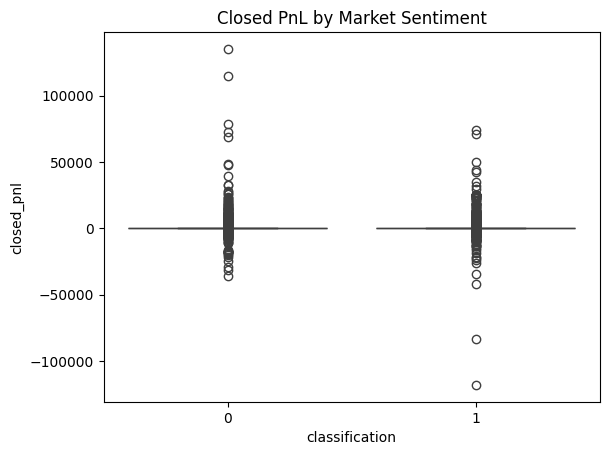

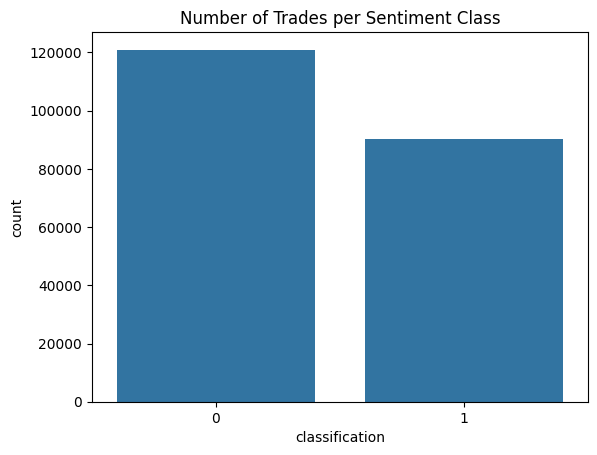

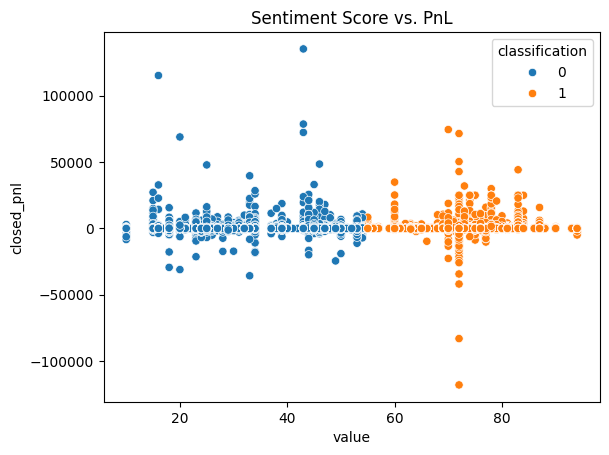

In [172]:
# PnL Distribution by Sentiment
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title('Closed PnL by Market Sentiment')
plt.show()

# Trade Volume by Sentiment
sns.countplot(data=merged_df, x='classification')
plt.title('Number of Trades per Sentiment Class')
plt.show()

# Relationship between sentiment score and PnL
sns.scatterplot(data=merged_df, x='value', y='closed_pnl', hue='classification')
plt.title('Sentiment Score vs. PnL')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16672\3698743684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate_by_sentiment, x='classification', y='profitable', palette='viridis')
c:\Users\Lenovo\Desktop\new vs\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


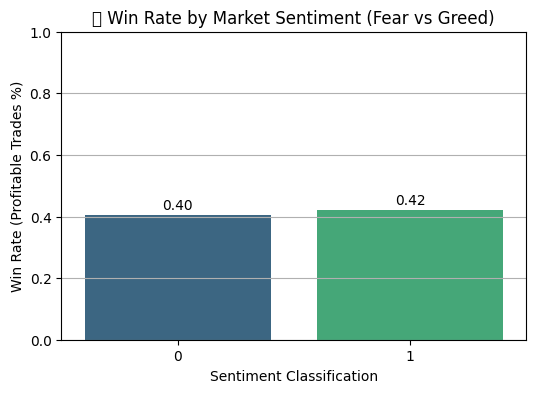

In [ ]:
win_rate_by_sentiment = merged_df.groupby('classification')['profitable'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=win_rate_by_sentiment, x='classification', y='profitable', palette='viridis')
plt.title(" Win Rate by Market Sentiment (Fear vs Greed)")
plt.ylabel("Win Rate (Profitable Trades %)")
plt.xlabel("Sentiment Classification")
plt.ylim(0, 1)
plt.grid(axis='y')

for i, row in win_rate_by_sentiment.iterrows():
    plt.text(i, row['profitable'] + 0.02, f"{row['profitable']:.2f}", ha='center')

plt.show()


In [138]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'classification', 'value', 'profitable',
       'pnl_per_usd', 'log_size', 'fee_pct'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = ['log_size', 'fee_pct', 'value', 'direction']
X = merged_df[features]
y = merged_df['profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.84     37196
           1       0.78      0.77      0.78     26170

    accuracy                           0.82     63366
   macro avg       0.81      0.81      0.81     63366
weighted avg       0.82      0.82      0.82     63366



In [148]:
# another model just for reference
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

def train_and_evaluate(features, X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n Results for Logistic Regression ({label})")
    print("-" * 50)
    print("Features Used:", features)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

# target
y = merged_df['profitable'].astype(int)

# With fee_pct
features_with_fee = ['log_size', 'fee_pct', 'value', 'direction']
X_with_fee = merged_df[features_with_fee].astype(float)
model_with_fee = train_and_evaluate(features_with_fee, X_with_fee, y, "with fee_pct")

# Without fee_pct
features_without_fee = ['log_size', 'value', 'direction']
X_without_fee = merged_df[features_without_fee].astype(float)
model_without_fee = train_and_evaluate(features_without_fee, X_without_fee, y, "without fee_pct")



 Results for Logistic Regression (with fee_pct)
--------------------------------------------------
Features Used: ['log_size', 'fee_pct', 'value', 'direction']
Accuracy: 0.62774989742133
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65     37196
           1       0.54      0.68      0.60     26170

    accuracy                           0.63     63366
   macro avg       0.63      0.63      0.63     63366
weighted avg       0.65      0.63      0.63     63366


 Results for Logistic Regression (without fee_pct)
--------------------------------------------------
Features Used: ['log_size', 'value', 'direction']
Accuracy: 0.62774989742133
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65     37196
           1       0.54      0.68      0.60     26170

    accuracy                           0.63     63366
   macro avg       0.63      0.63      

In [143]:
# Removing 'fee_pct'
features = ['log_size', 'value', 'direction']  # removed 'fee_pct'

X = merged_df[features].astype(float)
y = merged_df['profitable'].astype(int)


In [ ]:
# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features = ['log_size', 'value', 'direction']
X = merged_df[features].astype(float)
y = merged_df['profitable'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [155]:
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [164]:
y_pred = lg_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65     37196
           1       0.54      0.68      0.60     26170

    accuracy                           0.63     63366
   macro avg       0.63      0.63      0.63     63366
weighted avg       0.65      0.63      0.63     63366



In [ ]:
# for comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


In [159]:
# For Logistic Regression
logistic_reg = evaluate_model(lg_model, X_test, y_test)

# For Random Forest
random_forest = evaluate_model(model, X_test, y_test)


In [ ]:
import pandas as pd
comparison_df = pd.DataFrame(
    [logistic_reg, random_forest],
    index=["Logistic Regression", "Random Forest"]
).round(3)

from IPython.display import display
display(comparison_df)




,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.628,0.539,0.676,0.600
Random Forest,0.816,0.783,0.767,0.775
